In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('economic_index.csv');


In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [8]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

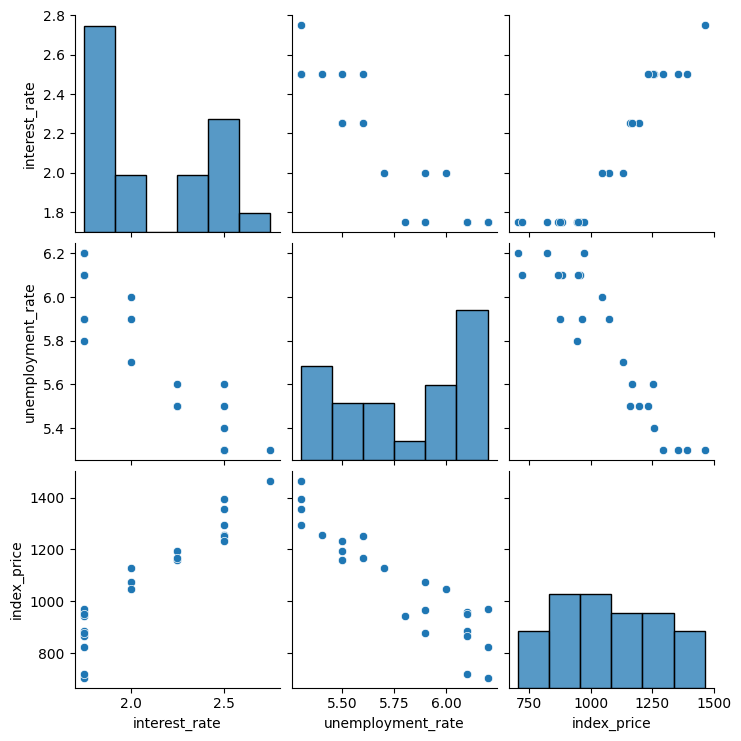

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [11]:
#independent and dependent features
X=df.iloc[:,:-1]#this means that all the rows and all the columns minus the last one
y=df.iloc[:,-1]#this says that just take the last column

In [12]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

<Axes: xlabel='interest_rate', ylabel='index_price'>

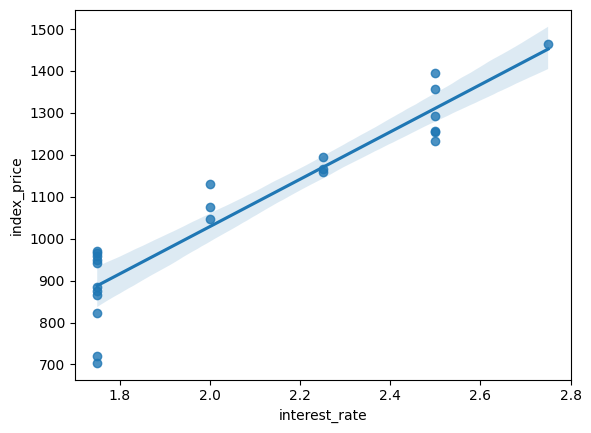

In [24]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

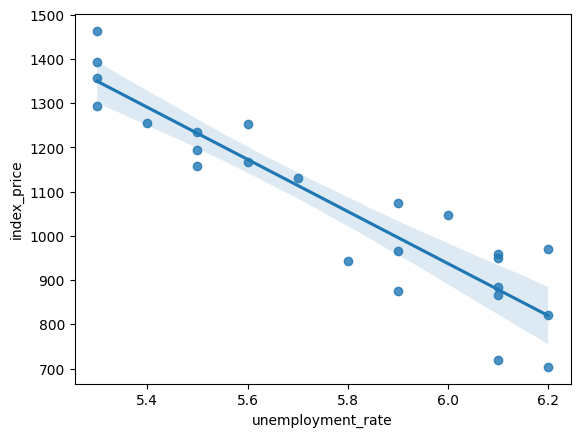

In [25]:
sns.regplot(x='unemployment_rate',y='index_price',data=df)

In [26]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [28]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
from sklearn.model_selection import cross_val_score
validation=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [32]:
validation

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [33]:
np.mean(validation)

-5914.828180162386

In [34]:
y_pred=regression.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [36]:
mae=mean_absolute_error(y_test,y_pred)

In [37]:
rmse=np.sqrt(mse)

In [38]:
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323554
76.11677139574813


In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457142


In [42]:
#adjusted r squared

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.713163015242857

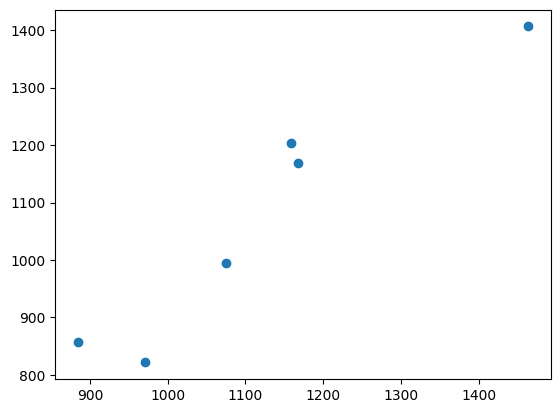

In [43]:
plt.scatter(y_test,y_pred)

In [44]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


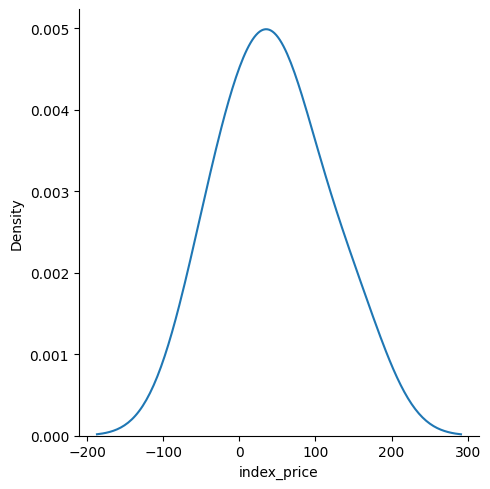

In [46]:
sns.displot(residuals,kind='kde')

In [51]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [50]:
pip install statsmodels


  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/d5/7e/61ec96b208af273126a211a9aa1c9dfefb216725192973fc52a858ac9219/statsmodels-0.14.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
    --------------------------------------- 0.2/9.9 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.9 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 6.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.9 MB 7.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 8.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.9 MB 8.8 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
model.summary()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 12 Jun 2024   Prob (F-statistic):                       0.754
Time:                        21:05:10   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(regression.coef_)#we can see that the coefficientsare same fro both the models

[  88.27275507 -116.25716066]
